<a href="https://colab.research.google.com/github/tofighi/ITM760/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to download datasets to the environment?
You can use `!wget` to download files directly to your Colab environment to start processing them. For example, `Salaries.csv` is one of the files we need for processing in GitHub which is available [here](https://github.com/tofighi/ITM760/blob/main/dataset/Salaries.csv). However, when we want to download it to Colab, we should click on `Raw` to download the file, not its GitHub page! The link to file is `https://raw.githubusercontent.com/tofighi/ITM760/main/dataset/Salaries.csv`.

With `-O` option of `wget` of command you can rename the file when downloading.

In [1]:
!wget -q https://raw.githubusercontent.com/tofighi/ITM760/main/dataset/Salaries.csv -O salaries.csv

## Common Data Science Related libraries

In [2]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

### Use Pandas to load Salaries.csv data
In the previous cell we downloaded a Salaries.csv directly to Colab environment using `!wget`. Now, you can show analyze it using `Pandas` library as follows:

In [3]:
# we renamed the file to salaries.csv
df = pd.read_csv("salaries.csv")
# List first 5 records
df.head(5)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


### Data Frames groupby() method
Using "group by" method we can:
- Split the data into groups based on some criteria
- Calculate statistics (or apply a function) to each group
- Similar to `dplyr()` function in R



In [4]:
#Group data using rank
df_rank = df.groupby(['rank'])
#Calculate mean value for each numeric column per each group
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


### Data Frames groupby() method
Once groupby() object is created we can calculate various statistics for each group.

`Note:` If single brackets are used to specify the column (e.g. salary), then the output is Pandas Series object. When double brackets are used the output is a Data Frame



In [5]:
#Calculate mean salary for each professor rank:
df.groupby('rank')[['salary']].mean()

,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


### Missing Values
Missing values are marked as `NaN`


In [6]:
!wget -q https://raw.githubusercontent.com/tofighi/ITM760/main/dataset/flights.csv -O flights.csv

In [7]:
# Read a dataset with missing values
flights = pd.read_csv("flights.csv")
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
330,2013,1,1,1807.0,29.0,2251.0,NaN,UA,N31412,1228,EWR,SAN,NaN,2425,18.0,7.0
403,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EHAA,791,LGA,DFW,NaN,1389,NaN,NaN
404,2013,1,1,NaN,NaN,NaN,NaN,AA,N3EVAA,1925,LGA,MIA,NaN,1096,NaN,NaN
855,2013,1,2,2145.0,16.0,NaN,NaN,UA,N12221,1299,EWR,RSW,NaN,1068,21.0,45.0
858,2013,1,2,NaN,NaN,NaN,NaN,AA,NaN,133,JFK,LAX,NaN,2475,NaN,NaN


### Missing Values
- When summing the data, missing values will be treated as zero
- If all values are missing, the sum will be equal to `NaN`
- `cumsum()` and `cumprod()` methods ignore missing values but preserve them in the resulting arrays
- Missing values in `GroupBy` method are excluded (just like in R)
- Many descriptive statistics methods have `skipna` option to control if missing data should be excluded . This value is set to True by default (unlike R)

### Aggregation Functions in Pandas
Aggregation - computing a summary statistic about each group, i.e.
- compute group sums or means
- compute group sizes/counts

Common aggregation functions:

- min, max
- count, sum, prod
- mean, median, mode, mad
- std, var


`agg()` method are useful when multiple statistics are computed per column:


In [8]:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-33.000000,-75.000000
mean,9.463773,2.094537
max,1014.000000,1007.000000


In [9]:
#importing libraries
import pandas as pd
import numpy as np
# creating a sample DataFrame
sales_data = pd.DataFrame({"name":["William","Emma","Sofia","Markus","Edward","Thomas","Ethan",np.nan,"Arun","Anika","Paulo"]
,"region":[np.nan,"North","East","South","West","West","South",np.nan,"West","East","South"]
,"sales":[50000,52000,90000,np.nan,42000,72000,49000,np.nan,67000,65000,67000]
,"expenses":[42000,43000,np.nan,44000,38000,39000,42000,np.nan,39000,44000,45000]})
sales_data


,name,region,sales,expenses
0,William,NaN,50000.0,42000.0
1,Emma,North,52000.0,43000.0
2,Sofia,East,90000.0,NaN
3,Markus,South,NaN,44000.0
4,Edward,West,42000.0,38000.0
5,Thomas,West,72000.0,39000.0
6,Ethan,South,49000.0,42000.0
7,NaN,NaN,NaN,NaN
8,Arun,West,67000.0,39000.0
9,Anika,East,65000.0,44000.0


In [10]:
sales_data.dropna()

,name,region,sales,expenses
1,Emma,North,52000.0,43000.0
4,Edward,West,42000.0,38000.0
5,Thomas,West,72000.0,39000.0
6,Ethan,South,49000.0,42000.0
8,Arun,West,67000.0,39000.0
9,Anika,East,65000.0,44000.0
10,Paulo,South,67000.0,45000.0


In [11]:
sales_data.dropna(how = 'all')

,name,region,sales,expenses
0,William,NaN,50000.0,42000.0
1,Emma,North,52000.0,43000.0
2,Sofia,East,90000.0,NaN
3,Markus,South,NaN,44000.0
4,Edward,West,42000.0,38000.0
5,Thomas,West,72000.0,39000.0
6,Ethan,South,49000.0,42000.0
8,Arun,West,67000.0,39000.0
9,Anika,East,65000.0,44000.0
10,Paulo,South,67000.0,45000.0


In [12]:
sales_data.dropna(subset = ['sales', 'expenses'])

,name,region,sales,expenses
0,William,NaN,50000.0,42000.0
1,Emma,North,52000.0,43000.0
4,Edward,West,42000.0,38000.0
5,Thomas,West,72000.0,39000.0
6,Ethan,South,49000.0,42000.0
8,Arun,West,67000.0,39000.0
9,Anika,East,65000.0,44000.0
10,Paulo,South,67000.0,45000.0


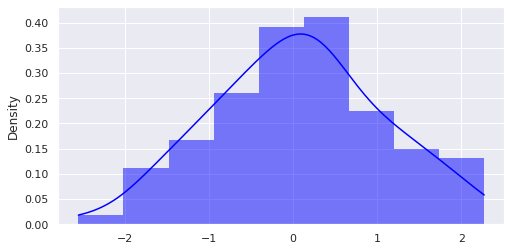

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.histplot(x, color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
plt.show()